In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import math
import os
from array import *

In [2]:
data_port = pd.read_csv('raw_data/IMO9371361_201810_hcx_port_mp.csv', header=0, sep=";")

In [3]:
data_stbd = pd.read_csv('raw_data/IMO9371361_201810_hcx_stbd_mp.csv', header=0, sep=";")

In [5]:
display(data_port.head())

,uid,time_in_ms,AzimuthFeedback,AzimuthOrder,LoadFeedback,PositionInCommand,RPMFeedback,RPMOrder,Running,PT31,...,PS31,DPA1,DPA2,LS31_Low,LS31_High,LS32_Low,LS32_High,LS34_Low,LS34_High,LS33_High
0,105997990,1538352000409,-0.200054,-0.687561,0.016582,5.0,0.100125,0.0,0,0.461219,...,1,1,1,1,1,1,1,1,1,0
1,105997991,1538352001409,-0.200054,-0.912415,-0.016582,5.0,0.108469,0.0,0,0.454998,...,1,1,1,1,1,1,1,1,1,0
2,105997992,1538352002409,-0.400108,0.213345,0.053890,5.0,0.108469,0.0,0,0.456657,...,1,1,1,1,1,1,1,1,1,0
3,105997993,1538352003409,-0.200054,0.213345,0.016582,5.0,0.116813,0.0,0,0.455827,...,1,1,1,1,1,1,1,1,1,0
4,105997994,1538352004408,-0.200054,0.213345,-0.037309,5.0,0.100125,0.0,0,0.457694,...,1,1,1,1,1,1,1,1,1,0


In [44]:
# Create a latitude and longitude location
df1 = pd.DataFrame({
    "time_in_ms": data_stbd["time_in_ms"].values,
    "AzimuthFeedback_stbd": data_stbd["AzimuthFeedback"].values,
    "RPMFeedback_stbd": data_stbd["RPMFeedback"].values
})

In [45]:
# Create a latitude and longitude location
df2 = pd.DataFrame({
    "time_in_ms": data_port["time_in_ms"].values,
    "AzimuthFeedback_port": data_port["AzimuthFeedback"].values,
    "RPMFeedback_port": data_port["RPMFeedback"].values,
})

In [46]:
display(df1)

,time_in_ms,AzimuthFeedback_stbd,RPMFeedback_stbd
0,1538352000409,-1.199871,0.058382
1,1538352001409,-1.199871,0.033361
2,1538352002409,-1.199871,0.058382
3,1538352003409,-1.199871,0.041701
4,1538352004408,-1.199871,0.050042
5,1538352005408,-1.199871,0.050042
6,1538352006409,-1.199871,0.066722
7,1538352007409,-1.199871,0.075063
8,1538352008409,-1.199871,0.066722
9,1538352009409,-1.199871,0.050042


In [47]:
display(df2)

,time_in_ms,AzimuthFeedback_port,RPMFeedback_port
0,1538352000409,-0.200054,0.100125
1,1538352001409,-0.200054,0.108469
2,1538352002409,-0.400108,0.108469
3,1538352003409,-0.200054,0.116813
4,1538352004408,-0.200054,0.100125
5,1538352005408,-0.200054,0.083438
6,1538352006409,-0.200054,0.100125
7,1538352007409,-0.200054,0.083438
8,1538352008409,-0.200054,0.075094
9,1538352009409,-0.200054,0.083438


In [48]:
data = df1.merge(df2, how='inner', on='time_in_ms')

In [49]:
display(data)

,time_in_ms,AzimuthFeedback_stbd,RPMFeedback_stbd,AzimuthFeedback_port,RPMFeedback_port
0,1538352000409,-1.199871,0.058382,-0.200054,0.100125
1,1538352001409,-1.199871,0.033361,-0.200054,0.108469
2,1538352002409,-1.199871,0.058382,-0.400108,0.108469
3,1538352003409,-1.199871,0.041701,-0.200054,0.116813
4,1538352004408,-1.199871,0.050042,-0.200054,0.100125
5,1538352005408,-1.199871,0.050042,-0.200054,0.083438
6,1538352006409,-1.199871,0.066722,-0.200054,0.100125
7,1538352007409,-1.199871,0.075063,-0.200054,0.083438
8,1538352008409,-1.199871,0.066722,-0.200054,0.075094
9,1538352009409,-1.199871,0.050042,-0.200054,0.083438


In [50]:
# definitions for the axes
left, width = 0.1, 0.9
bottom, height =  0.1, 0.65

rect_scatter = [left, bottom, width, height]

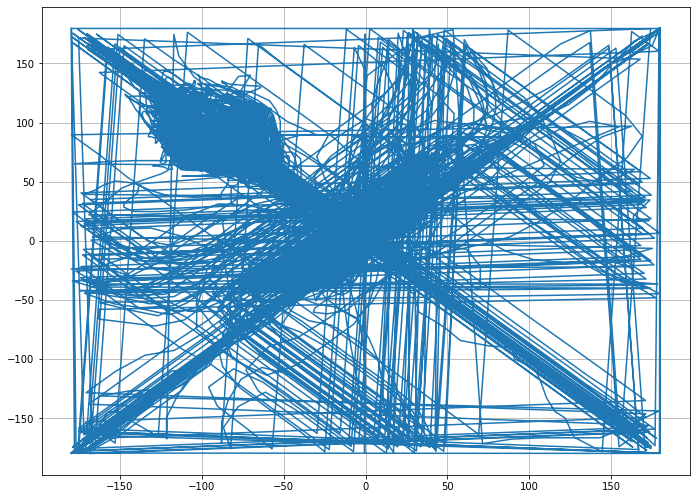

In [51]:
# start with a rectangular Figure
fig = plt.figure(1, figsize=(10,10))
axScatter = plt.axes(rect_scatter)

# the scatter plot:
axScatter.plot(data.AzimuthFeedback_stbd, data.AzimuthFeedback_port)
axScatter.grid()
plt.show()